# NYCDSA Machine Learning Project - House Prices

## Gradient Boosting Model

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import xgboost as xgb

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [6]:
%store -r X
%store -r y

In [15]:
X.head()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,LotConfig_1.0,LotConfig_2.0,LotConfig_3.0,LotConfig_4.0,GarageType_1.0,GarageType_2.0,GarageType_3.0,GarageType_4.0,GarageType_5.0,GarageType_6.0,Condition1_1.0,Condition1_2.0,Condition1_3.0,Condition1_4.0,Condition1_5.0,Condition1_6.0,Condition1_7.0,Condition1_8.0,CentralAir_1.0,RoofStyle_1.0,RoofStyle_2.0,RoofStyle_3.0,RoofStyle_4.0,RoofStyle_5.0,RoofMatl_1.0,RoofMatl_2.0,RoofMatl_3.0,RoofMatl_4.0,RoofMatl_5.0,RoofMatl_6.0,RoofMatl_7.0,HouseStyle_1.0,HouseStyle_2.0,HouseStyle_3.0,HouseStyle_4.0,HouseStyle_5.0,HouseStyle_6.0,HouseStyle_7.0,Exterior2nd_1.0,Exterior2nd_2.0,Exterior2nd_3.0,Exterior2nd_4.0,Exterior2nd_5.0,Exterior2nd_6.0,Exterior2nd_7.0,Exterior2nd_8.0,Exterior2nd_9.0,Exterior2nd_10.0,Exterior2nd_11.0,Exterior2nd_12.0,Exterior2nd_13.0,Exterior2nd_14.0,Exterior2nd_15.0,Exterior1st_1.0,Exterior1st_2.0,Exterior1st_3.0,Exterior1st_4.0,Exterior1st_5.0,Exterior1st_6.0,Exterior1st_7.0,Exterior1st_8.0,Exterior1st_9.0,Exterior1st_10.0,Exterior1st_11.0,Exterior1st_12.0,Exterior1st_13.0,Exterior1st_14.0,Condition2_1.0,Condition2_2.0,Condition2_3.0,Condition2_4.0,Condition2_5.0,Condition2_6.0,Condition2_7.0,Neighborhood_1.0,Neighborhood_2.0,Neighborhood_3.0,Neighborhood_4.0,Neighborhood_5.0,Neighborhood_6.0,Neighborhood_7.0,Neighborhood_8.0,Neighborhood_9.0,Neighborhood_10.0,Neighborhood_11.0,Neighborhood_12.0,Neighborhood_13.0,Neighborhood_14.0,Neighborhood_15.0,Neighborhood_16.0,Neighborhood_17.0,Neighborhood_18.0,Neighborhood_19.0,Neighborhood_20.0,Neighborhood_21.0,Neighborhood_22.0,Neighborhood_23.0,Neighborhood_24.0,MasVnrType_1.0,MasVnrType_1.2,MasVnrType_1.4,MasVnrType_1.6,MasVnrType_1.8,MasVnrType_2.0,MasVnrType_2.2,MasVnrType_2.6,MasVnrType_4.0,Foundation_1.0,Foundation_2.0,Foundation_3.0,Foundation_4.0,Foundation_5.0,MiscFeature_1.0,MiscFeature_2.0,MiscFeature_3.0,MiscFeature_4.0,BldgType_1.0,BldgType_2.0,BldgType_3.0,BldgType_4.0,SaleCondition_1.0,SaleCondition_2.0,SaleCondition_3.0,SaleCondition_4.0,SaleCondition_5.0,Street_1.0,Heating_1.0,Heating_2.0,Heating_3.0,Heating_4.0,Heating_5.0,SaleType_1.0,SaleType_2.0,SaleType_3.0,SaleType_4.0,SaleType_5.0,SaleType_6.0,SaleType_7.0,SaleType_8.0,MSZoning_1.0,MSZoning_2.0,MSZoning_3.0,MSZoning_4.0
0,60.0,65.0,8450.0,2.0,0.0,0.0,0.0,0.0,7.0,5.0,2003.0,2003.0,196.0,1.0,2.0,1.0,2.0,3.0,0.0,706.0,5.0,0.0,150.0,856.0,0.0,0.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,8.0,0.0,0.0,5.0,2003.0,1.0,2.0,548.0,2.0,2.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,2008.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,20.0,80.0,9600.0,2.0,0.0,0.0,0.0,0.0,6.0,8.0,1976.0,1976.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,978.0,5.0,0.0,284.0,1262.0,0.0,0.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,6.0,0.0,1.0,2.0,1976.0,1.0,2.0,460.0,2.0,2.0,0.0,298.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,2007.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,60.0,68.0,11250.0,2.0,1.0,0.0,0.0,0.0,7.0,5.0,2001.0,200

In [7]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [12]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[17:21:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 79641.179146


### k-fold Cross Validation using XGBoost

In [16]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=1)

[17:30:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:30:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,179169.864583,475.588606,179455.489583,733.582591
1,162520.114583,442.363566,163107.468750,723.700209
2,147385.666667,305.312984,148310.973958,836.411525
3,133776.177083,278.193797,135063.270833,973.066461
4,121506.036458,316.556079,123049.736979,935.049080
5,110352.299479,326.126905,112286.104167,932.553337
6,100410.195313,308.441003,102674.328125,948.738819
7,91518.205729,360.391184,94098.963542,926.271095
8,83380.481771,348.011905,86242.861979,1065.649730
9,76009.539062,377.148407,79302.747395,1225.057960


In [18]:
print((cv_results["test-rmse-mean"]).tail(1))

49    29668.341797
Name: test-rmse-mean, dtype: float64


In [33]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=100)

[18:58:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


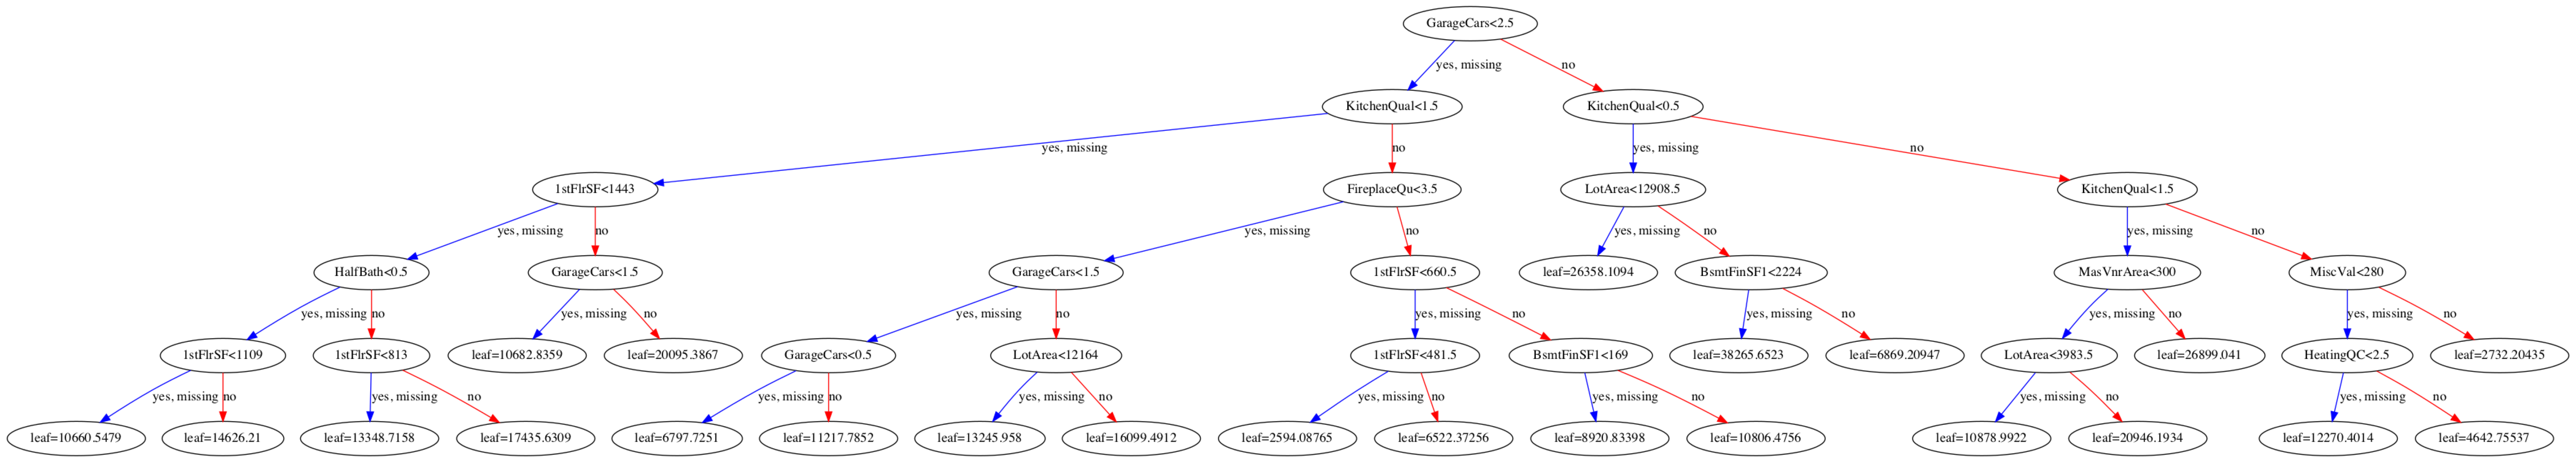

In [28]:
plt.rcParams['figure.figsize'] = (100, 100)
xgb.plot_tree(xg_reg,num_trees=2)
plt.show()

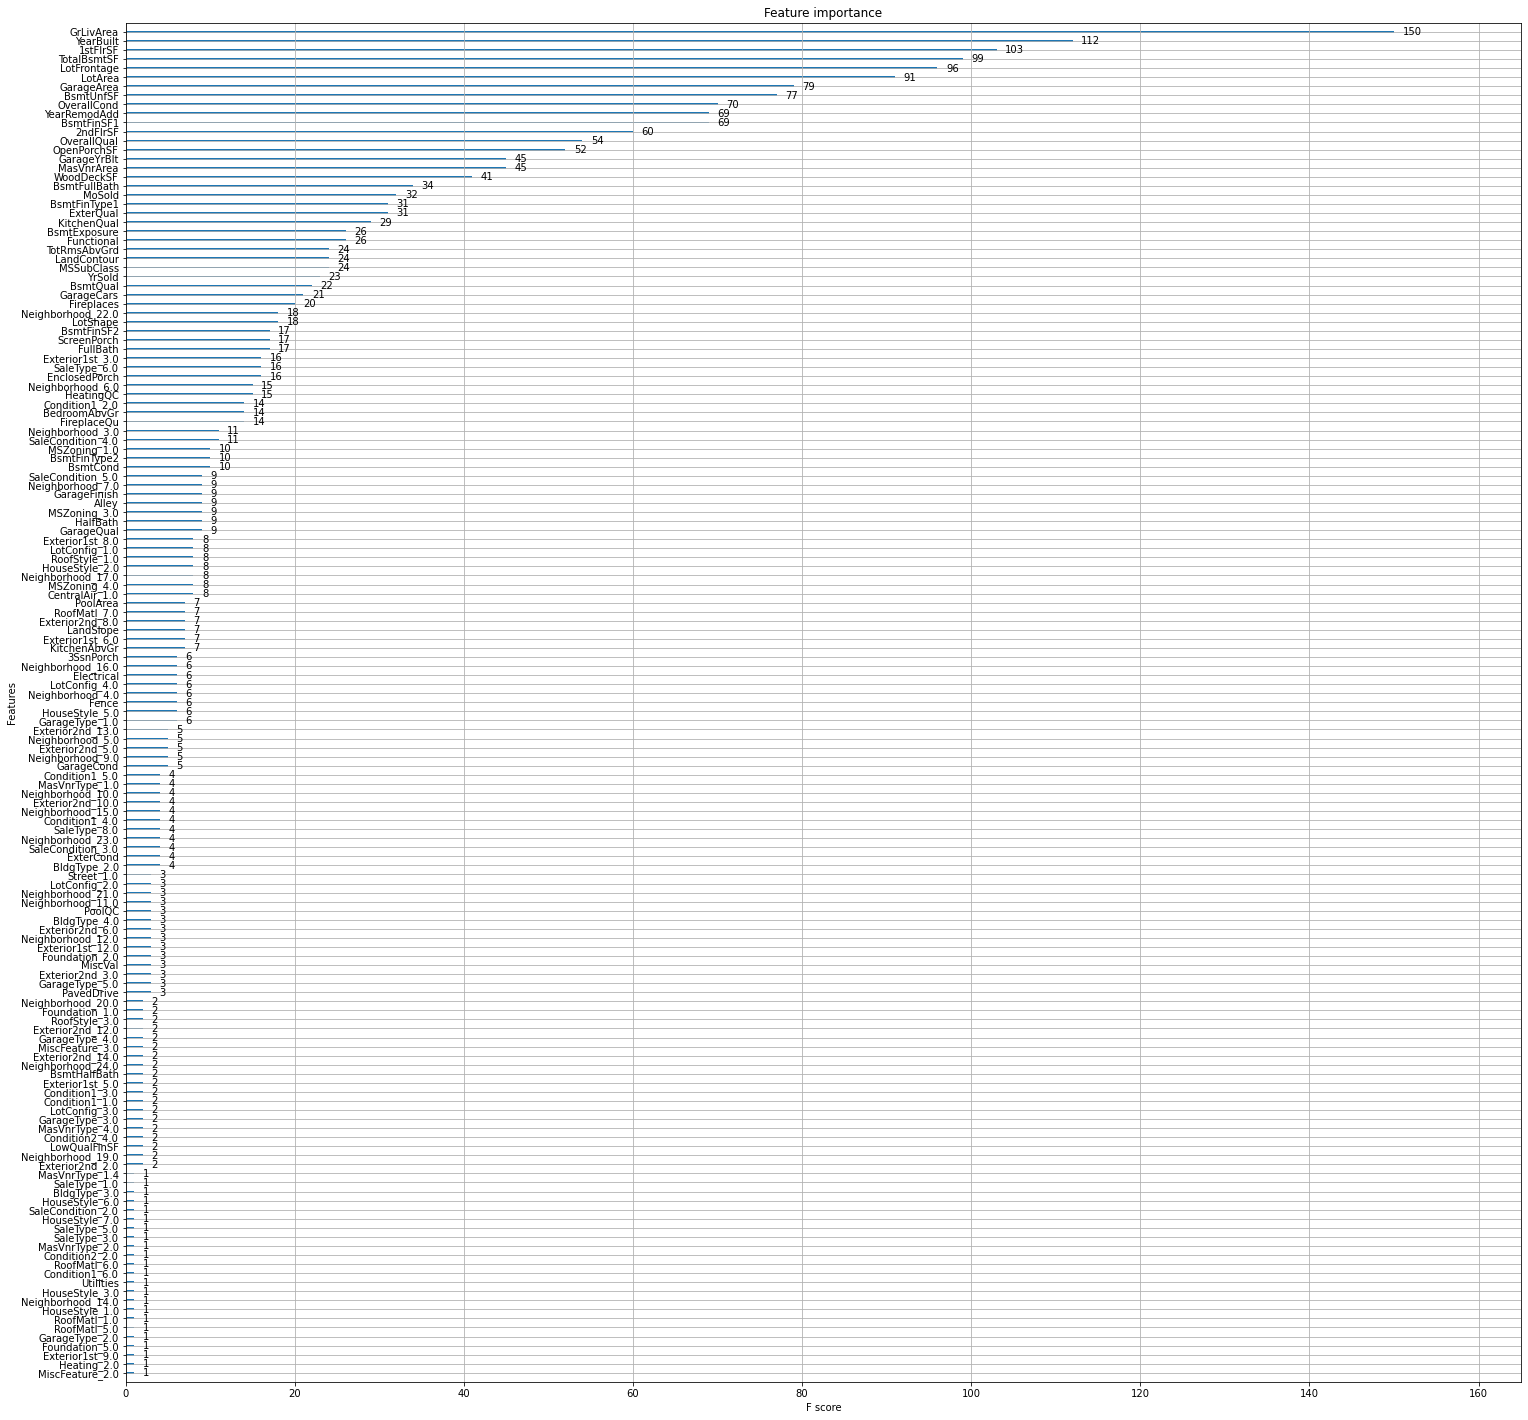

In [38]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

In [ ]:
xmodel=xgb.XGBRegressor(nthread= -1,gpu_id=-1)
# set the parameter grid
grid_para = {'min_child_weight': [1,2], # default = 1
             'gamma': [0, 0.025, 0.055, 0.075], # default = 0
             'reg_alpha': [0], # default = 0
             "learning_rate": [0.05, 0.078, 0.1], #  default=0.3
             'subsample': [0.2,0.3,0.4], # default =1
             'colsample_bytree': [0.4, 0.5, 0.6], # default =1
             'max_depth': [2,3,4], # default =6
             "n_estimators": [100,125,137,150],
             'random_state' :[1]
}
# run the XGB regressor through the grid search
grid_search_xmodel = ms.GridSearchCV(xmodel, grid_para, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
grid_search_xmodel.fit(Xu_train, yu_train)